In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset in pandas dataframe from a csv file
loan_data = pd.read_csv("loan_approval_dataset.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# information about dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
# check for any null values
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
# drop unuseful columns like loan_id
loan_data.drop("loan_id", axis=1, inplace =True)

In [6]:
loan_data.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


In [7]:
# remove any spaces  before or after column name
loan_data.columns
new_cols = []
for cols in loan_data.columns:
    new_cols.append(cols.strip())

loan_data.columns = new_cols

    

In [8]:
loan_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

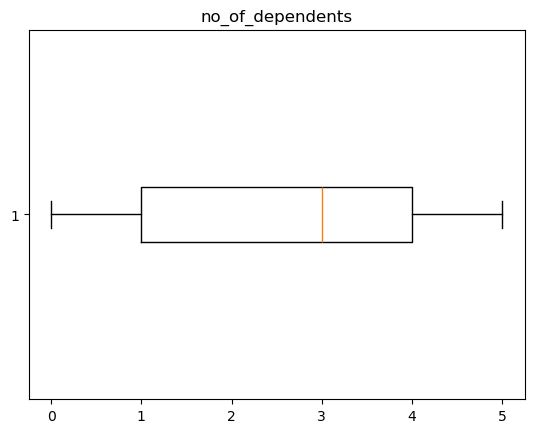

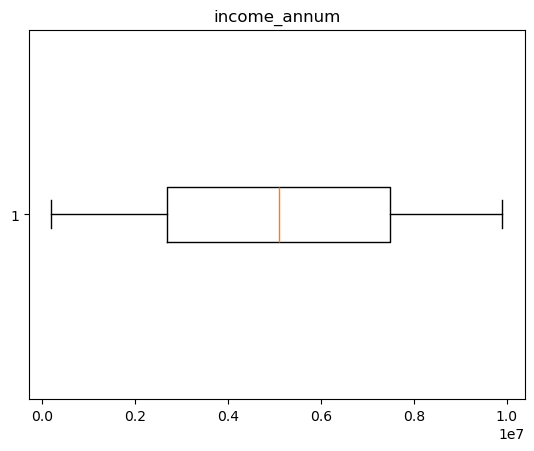

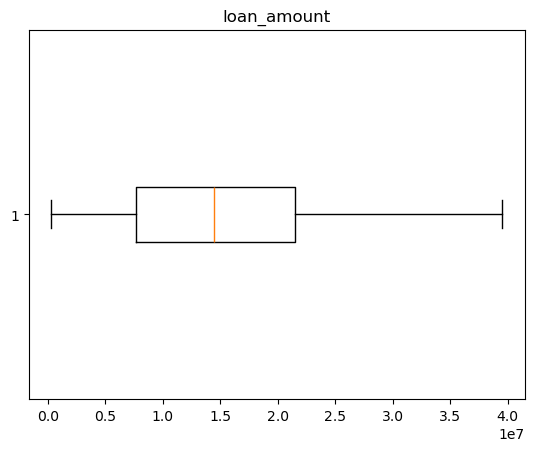

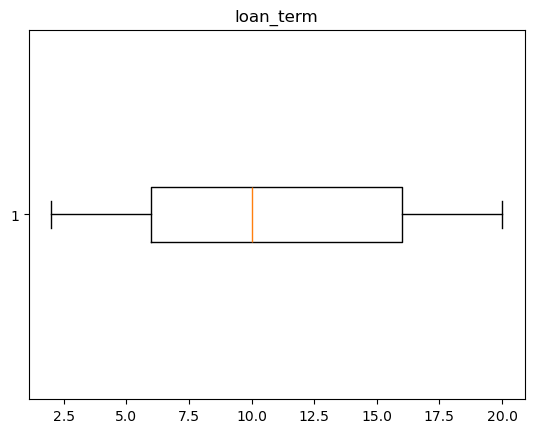

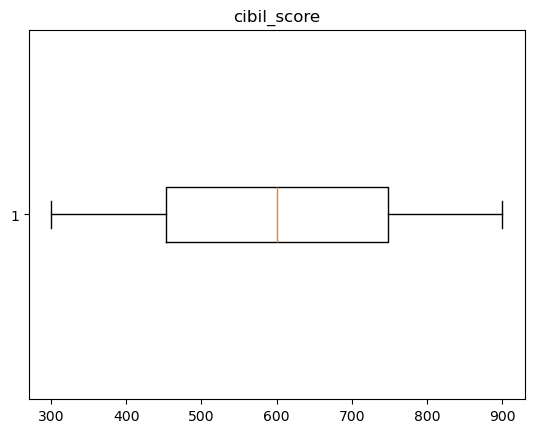

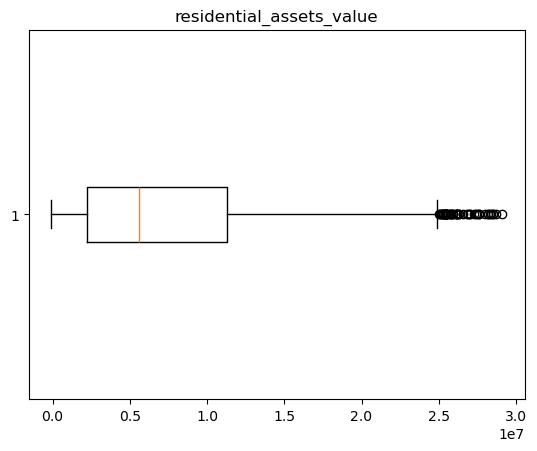

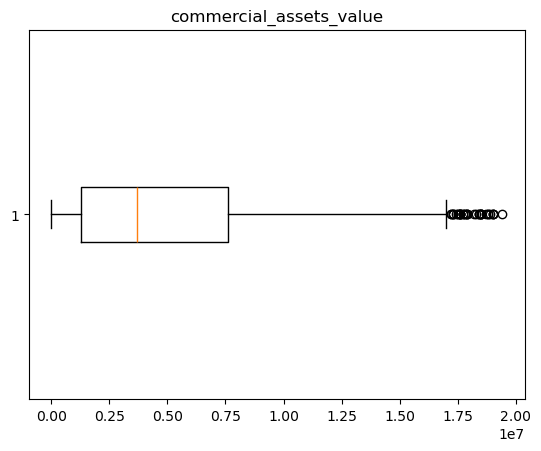

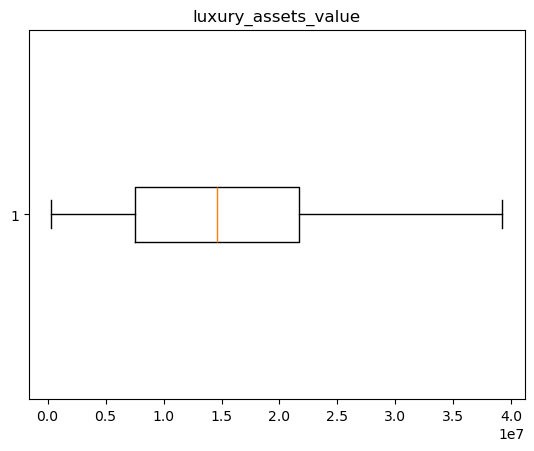

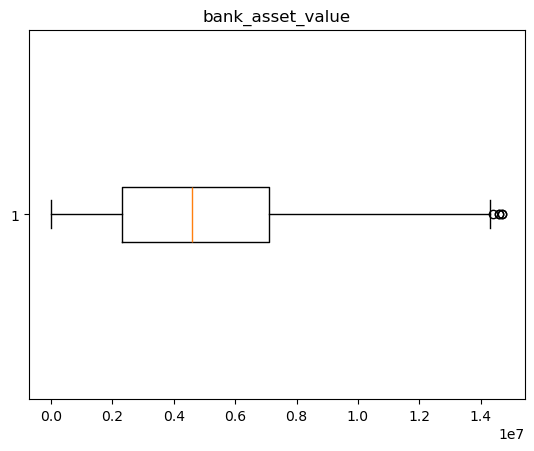

In [9]:
# box plot  for visualizing outliers
for cols in loan_data.columns:
    if(loan_data[cols].dtype !='O'):
        plt.boxplot(loan_data[cols], vert=False)
        plt.title(cols)
        plt.show()



In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


value count of education is education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64


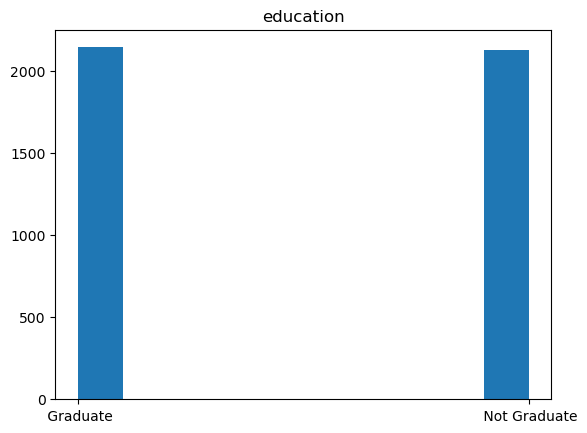

value count of self_employed is self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64


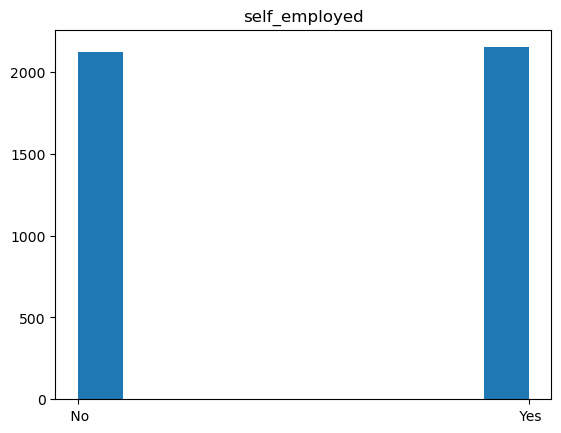

value count of loan_status is loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


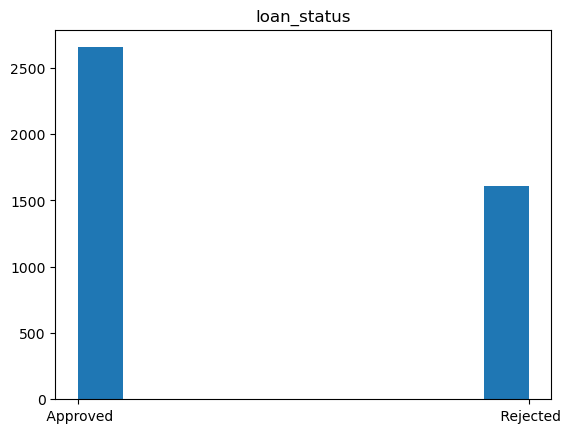

In [11]:
# histplot for categorical columns

for cols in loan_data.columns:
    if(loan_data[cols].dtype=='O'):
        print(f"value count of {cols} is {loan_data[cols].value_counts()}") 
        plt.hist(loan_data[cols])
        plt.title(cols)
        plt.show()
        

In [12]:
# cheking the ourliers count 
for cols in loan_data.columns:
    if(loan_data[cols].dtype!='O'):
        q1 = loan_data[cols].quantile(0.25)
        q3 = loan_data[cols].quantile(0.75)
        iqr = q3-q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        print(cols ,"----", ((loan_data[cols]<lower_limit) | (loan_data[cols]>upper_limit)).sum())
        

no_of_dependents ---- 0
income_annum ---- 0
loan_amount ---- 0
loan_term ---- 0
cibil_score ---- 0
residential_assets_value ---- 52
commercial_assets_value ---- 37
luxury_assets_value ---- 0
bank_asset_value ---- 5


In [13]:
loan_data.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


In [14]:
# checking the value counts of categorical columns
print(loan_data["education"].value_counts())
print(loan_data["self_employed"].value_counts())
print(loan_data["loan_status"].value_counts())


education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


In [27]:
# Converting categorical values into numerical values ... Transforming the value ( part of feature engineering)

loan_data["education"].replace({" Graduate":0 , " Not Graduate":1} , inplace= True)
loan_data["self_employed"].replace({" Yes":0, " No":1}, inplace=True)
loan_data["loan_status"].replace({" Approved":0," Rejected":1}, inplace= True)


In [29]:
loan_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [32]:
# segregating dependent and independent variables
x_loan_data = loan_data.drop("loan_status" , axis=1)
y_loan_data = loan_data["loan_status"]


In [33]:
# using scaling techniques like standard scaler to feature scaling
from sklearn.preprocessing import StandardScaler
std_scaler =  StandardScaler()
x_scaled_loan_data = std_scaler.fit_transform(x_loan_data)


In [35]:
df_scaled_x = pd.DataFrame(x_scaled_loan_data , columns= x_loan_data.columns)
df_scaled_x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,-0.995559,1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,1.004461,-0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,-0.995559,1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,-0.995559,1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,1.004461,-0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172
...,...,...,...,...,...,...,...,...,...,...,...
4264,1.475067,-0.995559,-0.992765,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213
4265,-1.473548,1.004461,-0.992765,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732
4266,-0.294102,1.004461,1.007288,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907
4267,-0.883825,1.004461,1.007288,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341


In [36]:
# prepared train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled_x , y_loan_data, test_size=0.20 , random_state =87)

In [42]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((3415, 11), (854, 11), (3415,), (854,))

In [43]:
# Importing different models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [58]:
#  training the various model in a loop and evaluating their performance

list_of_models= [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
                 XGBClassifier(),KNeighborsClassifier()]

for mods in list_of_models:
    model = mods
    model.fit(X_train, y_train)
    print("******************************")
    print("Evaluation report of model-- ", mods)
    print("Accuracy report " , accuracy_score(y_test, model.predict(X_test)))
    print("Classification report \n", classification_report(y_test, model.predict(X_test)))
    print("Confusion Matrix \n ", confusion_matrix(y_test, model.predict(X_test)))
    

******************************
Evaluation report of model--  LogisticRegression()
Accuracy report  0.9039812646370023
Classification report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       533
           1       0.87      0.87      0.87       321

    accuracy                           0.90       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.90      0.90       854

Confusion Matrix 
  [[492  41]
 [ 41 280]]
******************************
Evaluation report of model--  SVC()
Accuracy report  0.9320843091334895
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       533
           1       0.89      0.93      0.91       321

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

Confusion Matrix 
  [[498  35]
 [ 